In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, learning_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('PCOS_data.csv')

In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
# Drop the column containg almost all null and uninterpretable values
df= df.drop(columns='Unnamed: 44')
# Drop unnecessary colunms
df= df.drop(columns=['Sl. No','Patient File No.'])

In [5]:
df.shape

(541, 42)

In [6]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

### Column Description

* PCOS (Y/N): Indicates whether the patient has PCOS (1 = Yes, 0 = No).
* Age (yrs): Age of the patient in years.
* Weight (Kg): Weight of the patient in kilograms.
* Height (Cm): Height of the patient in centimeters.
* BMI: Body Mass Index calculated from weight and height.
* Blood Group: Blood group of the patient, represented as a numeric code.
* Pulse rate(bpm): Patient's pulse rate measured in beats per minute.
* RR (breaths/min): Respiratory rate measured in breaths per minute.
* Hb (g/dl): Hemoglobin level in grams per deciliter.
* Cycle (R/I): Menstrual cycle regularity (R = Regular, I = Irregular).
* Cycle length (days): Length of the menstrual cycle in days.
* Marraige Status (Yrs): Number of years married.
* Pregnant (Y/N): Indicates whether the patient is pregnant (1 = Yes, 0 = No).
* No. of abortions: Number of abortions the patient has had.
* I beta-HCG (mIU/mL): Beta-HCG level in milli-international units per milliliter (a hormone test often related to pregnancy).
* II beta-HCG (mIU/mL): A secondary beta-HCG hormone test.
* FSH (mIU/mL): Follicle Stimulating Hormone level in milli-international units per milliliter.
* LH (mIU/mL): Luteinizing Hormone level in milli-international units per milliliter.
* FSH/LH: Ratio of FSH to LH.
* Hip (in cm): Hip circumference in centimeters.
* Waist (in cm): Waist circumference in centimeters.
* Waist:Hip Ratio: The ratio of waist circumference to hip circumference.
* TSH (mIU/L): Thyroid Stimulating Hormone level in milli-international units per liter.
* AMH (ng/mL): Anti-Müllerian Hormone level in nanograms per milliliter.
* PRL (ng/mL): Prolactin hormone level in nanograms per milliliter.
* Vit D3 (ng/mL): Vitamin D3 level in nanograms per milliliter.
* PRG (ng/mL): Progesterone level in nanograms per milliliter.
* RBS (mg/dl): Random blood sugar level in milligrams per deciliter.
* Weight gain(Y/N): Indicates if the patient has experienced weight gain (1 = Yes, 0 = No).
* hair growth(Y/N): Indicates if the patient has experienced excessive hair growth (1 = Yes, 0 = No).
* Skin darkening (Y/N): Indicates if the patient has experienced skin darkening (1 = Yes, 0 = No).
* Hair loss (Y/N): Indicates if the patient has experienced hair loss (1 = Yes, 0 = No).
* Pimples (Y/N): Indicates if the patient has had pimples (1 = Yes, 0 = No).
* Fast food (Y/N): Indicates if the patient regularly consumes fast food (1 = Yes, 0 = No).
* Reg.Exercise(Y/N): Indicates if the patient engages in regular exercise (1 = Yes, 0 = No).
* BP _Systolic (mmHg): Systolic blood pressure in millimeters of mercury (mmHg).
* BP _Diastolic (mmHg): Diastolic blood pressure in millimeters of mercury (mmHg).
* Follicle No. (L): Number of follicles in the left ovary.
* Follicle No. (R): Number of follicles in the right ovary.
* Avg. F size (L) (mm): Average follicle size in the left ovary in millimeters.
* Avg. F size (R) (mm): Average follicle size in the right ovary in millimeters.
* Endometrium (mm): Thickness of the endometrium in millimeters.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [8]:
object_columns=['II    beta-HCG(mIU/mL)','AMH(ng/mL)']

df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [10]:
df[df.duplicated(df.columns[:-1])]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


In [11]:
df.nunique()

PCOS (Y/N)                  2
 Age (yrs)                 29
Weight (Kg)               117
Height(Cm)                 50
BMI                       157
Blood Group                 8
Pulse rate(bpm)            11
RR (breaths/min)            8
Hb(g/dl)                   46
Cycle(R/I)                  3
Cycle length(days)         12
Marraige Status (Yrs)      34
Pregnant(Y/N)               2
No. of abortions            6
  I   beta-HCG(mIU/mL)    307
II    beta-HCG(mIU/mL)    202
FSH(mIU/mL)               371
LH(mIU/mL)                342
FSH/LH                    339
Hip(inch)                  19
Waist(inch)                23
Waist:Hip Ratio            22
TSH (mIU/L)               308
AMH(ng/mL)                300
PRL(ng/mL)                481
Vit D3 (ng/mL)            331
PRG(ng/mL)                 89
RBS(mg/dl)                 55
Weight gain(Y/N)            2
hair growth(Y/N)            2
Skin darkening (Y/N)        2
Hair loss(Y/N)              2
Pimples(Y/N)                2
Fast food 

In [12]:
df.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [13]:
df=df.dropna()

## EDA

In [14]:
# Define age group bins and labels
df_age=pd.DataFrame()
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df_age['Age Group'] = pd.cut(df[' Age (yrs)'],bins = age_groups,labels = age_labels)
df_age["PCOS (Y/N)"]= df['PCOS (Y/N)']
age_group_counts = df_age.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()

/var/folders/l4/_b3qnlqx303c6970_sxvg0tr0000gn/T/ipykernel_11188/2741744880.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_age.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()


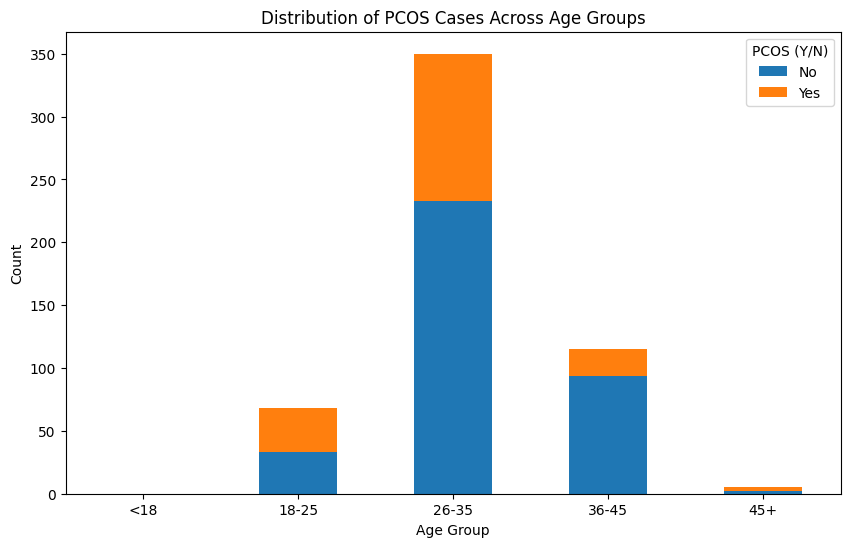

In [15]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

We can Understand from here that age group of 26-35 year have the highest chance of pcos

In [17]:
df_binary_columns=['PCOS (Y/N)', 'Pregnant(Y/N)','Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)']
df_reg_columns=[' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'BP _Systolic (mmHg)','BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

In [18]:
df_reg=df[df_reg_columns] 

### Distribution of Features

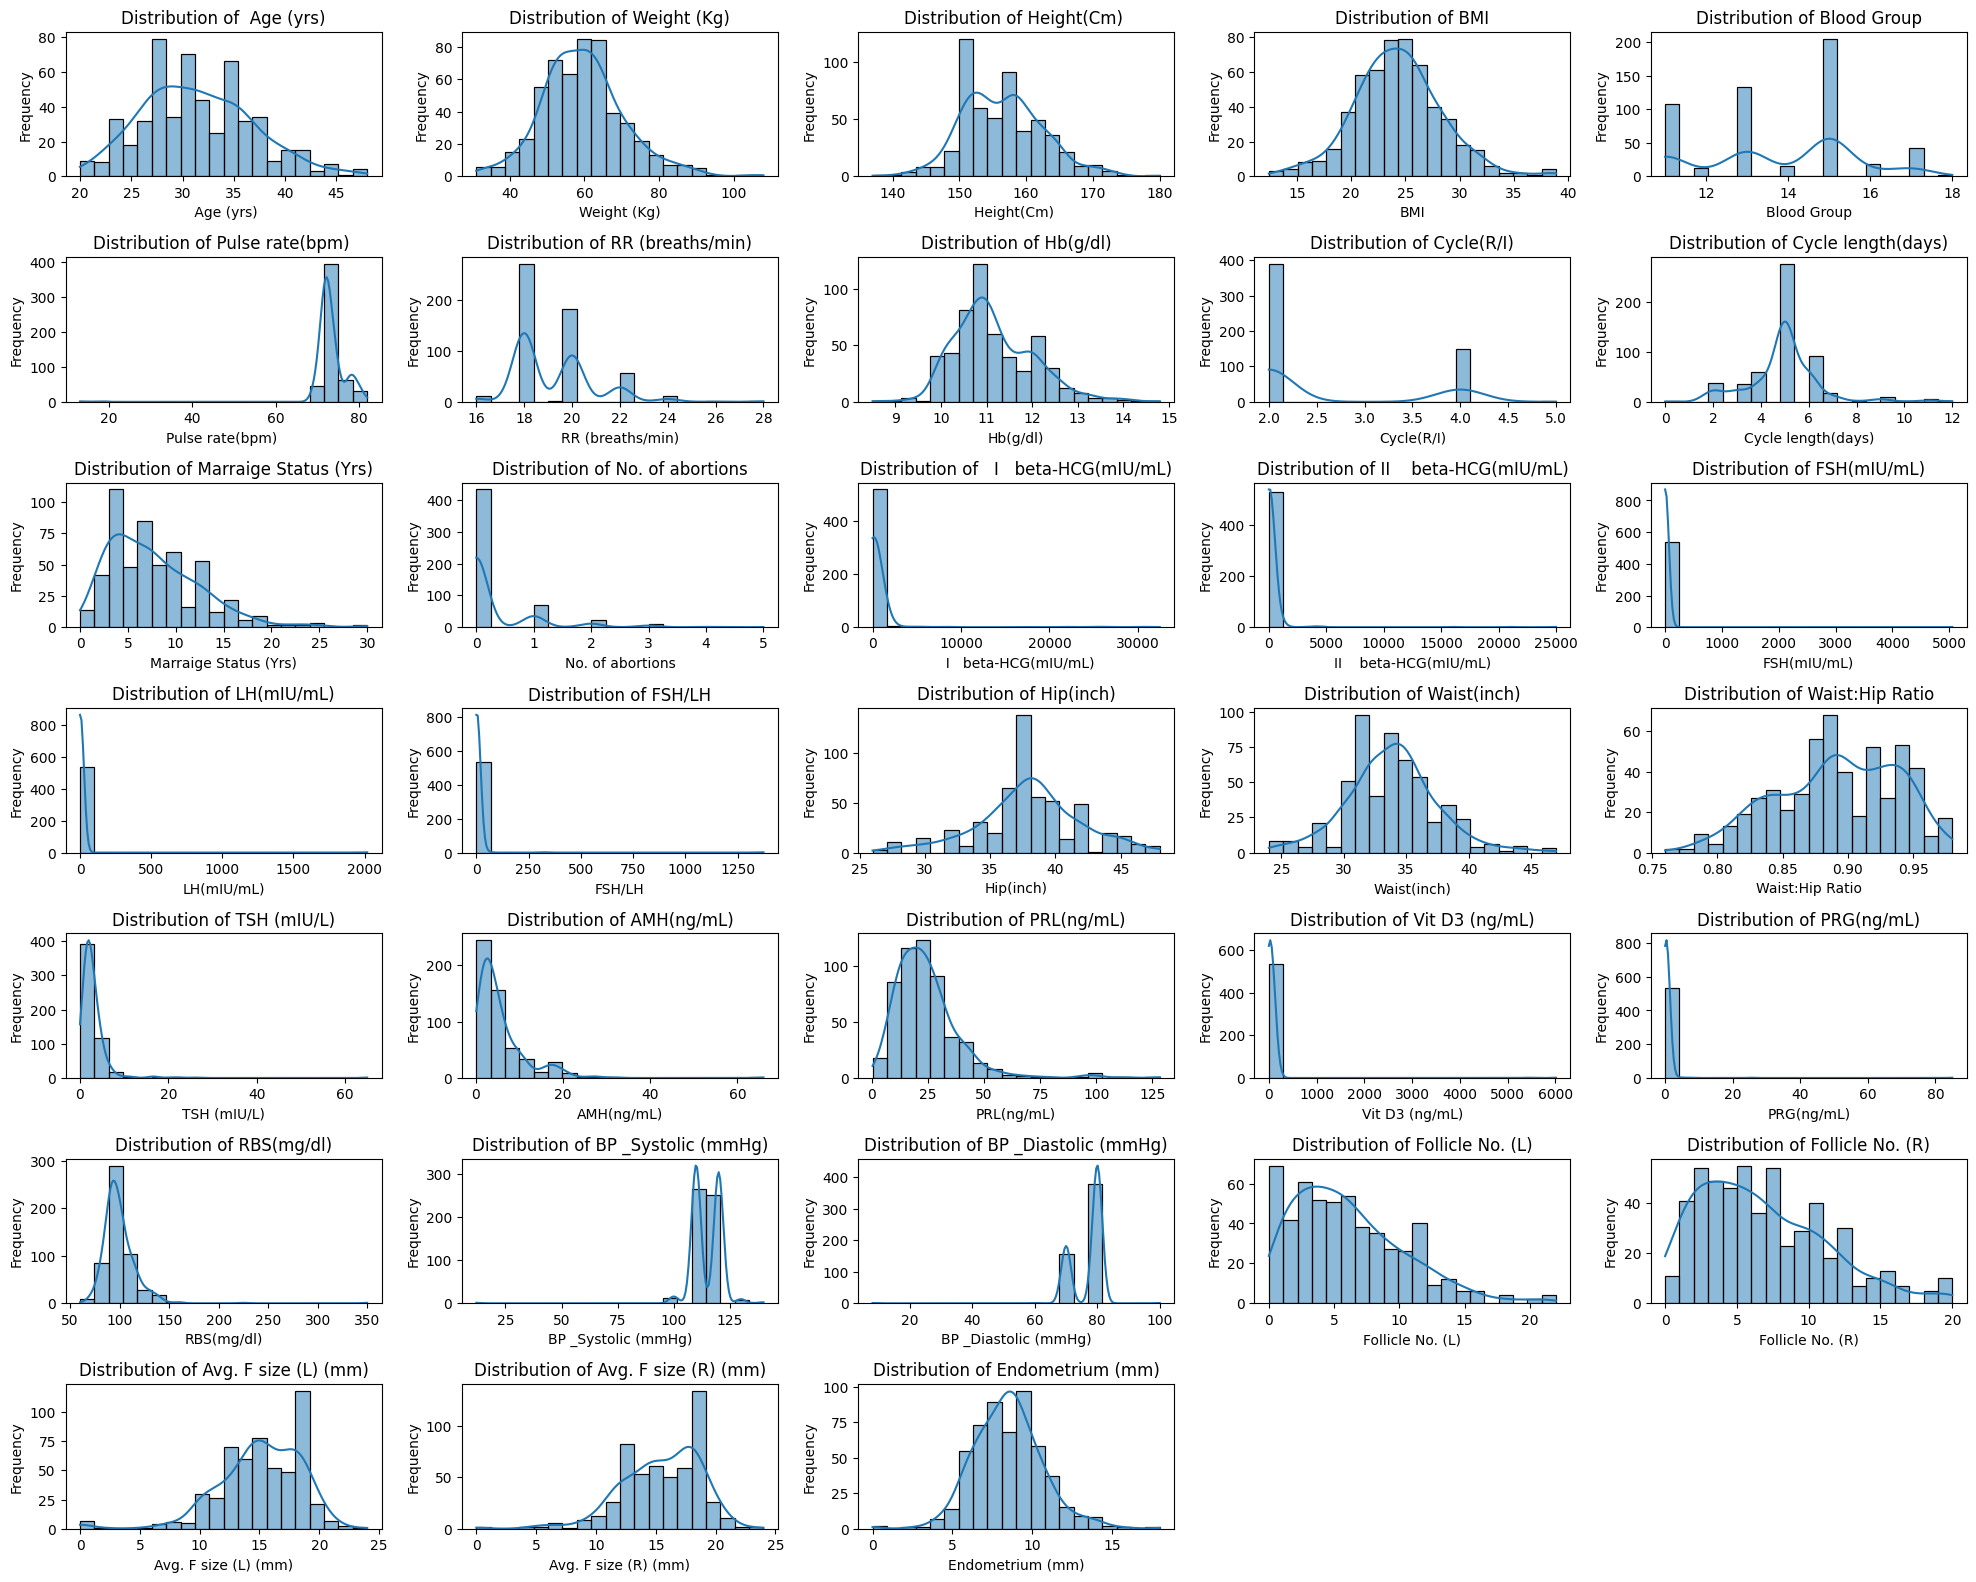

In [19]:
# Set plot size
plt.figure(figsize=(20,20))

# Loop through each numerical column and plot the distribution
for i, col in enumerate(df_reg_columns, 1):
    plt.subplot(9, 5, i)
    sns.histplot(df[col], kde=True, bins=20)  # Histogram with kernel density estimate (KDE)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Dropping Not necessary Columns

* Marriage Status is also not needed because there is no specific relationship the marriage and pcos condition.
* Weight and Height columns are also not needed beacuse there is column named BMI which gives a body size by dividing weight by height.
* Blood Group is not needed in the dataset because there is no specific relationship is found between Blood Group abd PCOS.
* Hip and Waist columns are also not needed because there is column named Waist-Hip Ratio which gives a measurment of body shape that is calculated by dividing waist circumfrance by hip circumfrance.
* Endometrium is also not needed because PCOS contributes to this medical condition, but there is no direct relationship between the Endometrium and PCOS.


In [20]:
df.drop(columns= ['Marraige Status (Yrs)','Weight (Kg)','Height(Cm) ',
                  'Blood Group','II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
                  'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)','TSH (mIU/L)',
                  'Endometrium (mm)','Cycle length(days)','No. of abortions']
                  , axis=1, inplace= True)

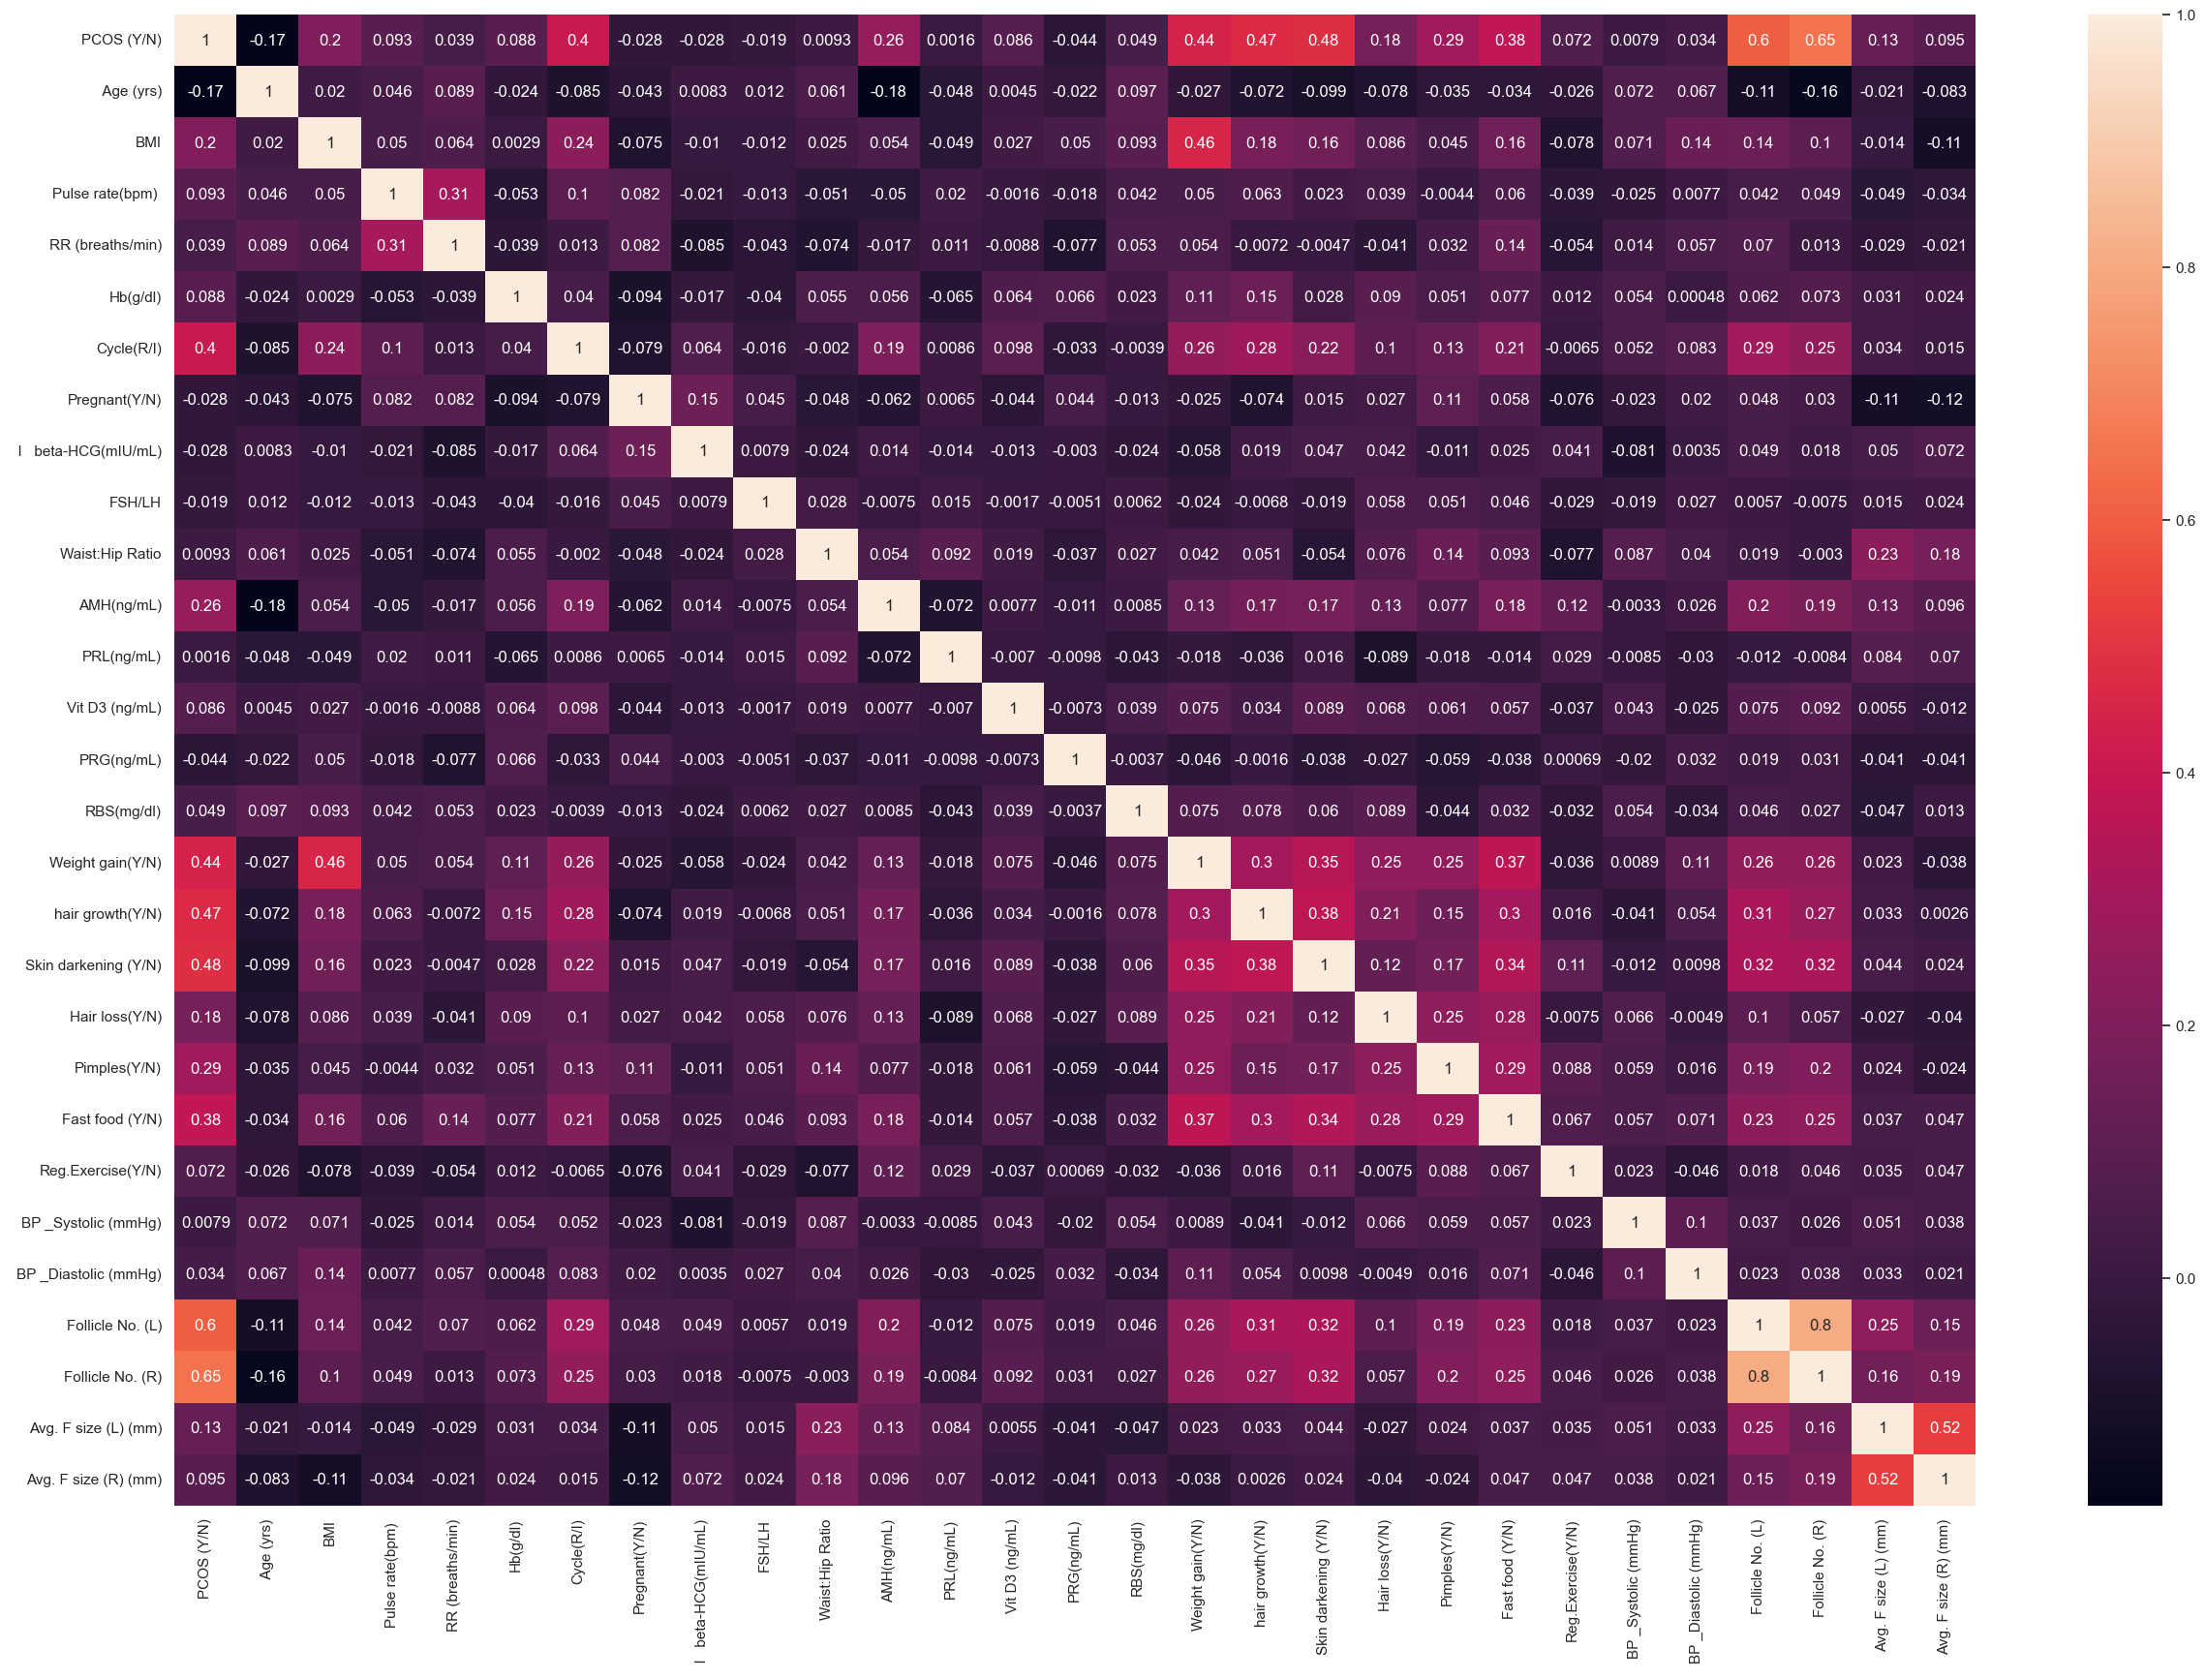

In [21]:

# Set the figure size
sns.set(rc={'figure.figsize':(30, 20)})  

sns.heatmap(df.corr(), annot = True)
plt.show()

### Important Features for correlation matrix

In [22]:

# important_features = correlation_matrix['PCOS (Y/N)'].sort_values(key=abs, ascending=False)

# # Print the important features
# print("Important features:")
# print(important_features[:12])


### Model Building

In [23]:

X = df.drop(['PCOS (Y/N)'], axis=1)

y = df['PCOS (Y/N)']

In [24]:

scaler = StandardScaler()
X[X.columns[:]] = scaler.fit_transform(X[X.columns[:]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 32)

In [26]:
X_train.shape, X_test.shape

((430, 28), (108, 28))

In [27]:
# Create a SelectKBest object with the desired scoring function and number of features
selector = SelectKBest(f_classif, k=10)  # Select top 10 features for classification

X_train_new= selector.fit_transform(X_train, y_train)
X_test_new= selector.transform(X_test)

# Now, X_new contains only the top 10 selected features

### Grid Search

In [28]:
def optimize_tree_and_boosting_models(X_train, y_train):
    # Define hyperparameter space for each model
    param_spaces = {
        'DT': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 3, 5],
        },
        'RF': {
            'n_estimators': [200, 250, 300],
            'max_depth': [10, 12, 15],
            'min_samples_split': [3, 4, 6],
            'min_samples_leaf': [1, 2, 5],
            'bootstrap': [True, False],
        },
        
        'GB': {  # Gradient Boosting
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [10, 15, 20],
            'subsample': [0.1, 0.3, 0.8],
        },
        'XGB': {  # XGBoost
            'n_estimators': [300, 400, 450],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.5, 0.8, 1.0],
            'colsample_bytree': [0.01, 0.1, 0.5],
        }
    }

    # Initialize the models
    models = {
        'DT': DecisionTreeClassifier(random_state=42),
        'RF': RandomForestClassifier(random_state=42),
        'GB': GradientBoostingClassifier(random_state=42),
        'XGB': XGBClassifier(random_state=42, eval_metric='mlogloss'),  # Removed use_label_encoder
    }

    best_models = {}

    # Loop through models and optimize each using GridSearchCV
    for model_name in models:
        print(f"Optimizing {model_name}...")
        
        # Initialize GridSearchCV
        opt = GridSearchCV(
            models[model_name],
            param_spaces[model_name],
            cv=5,  # 5-fold cross-validation
            n_jobs=-1,  # Use all available cores
            verbose=0
        )
        
        # Fit the GridSearchCV on the training data
        opt.fit(X_train, y_train)
        
        # Store the best model found
        best_models[model_name] = opt.best_estimator_
        print(f"Best parameters for {model_name}: {opt.best_params_}")
        print(f"Best score for {model_name}: {opt.best_score_}\n")
    
    return best_models


# Optimize and get the best models
best_models = optimize_tree_and_boosting_models(X_train_new, y_train)

Optimizing DT...
Best parameters for DT: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score for DT: 0.8395348837209303

Optimizing RF...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for RF: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250}
Best score for RF: 0.9

Optimizing GB...
Best parameters for GB: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.1}
Best score for GB: 0.8953488372093024

Optimizing XGB...
Best parameters for XGB: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.5}
Best score for XGB: 0.9



In [33]:
# Model evaluations
def evaluate_models_on_test(best_models, X_test, y_test):
    """Evaluates each model in the best_models dictionary on the test dataset and prints the test score."""
    
    test_scores = {}
    
    # Loop through each model and compute its test score
    for model_name, model in best_models.items():
        # Get predictions on the test set
        y_pred = model.predict(X_test_new)
        
        # Calculate the accuracy score (or you can use another metric like f1_score, precision, etc.)
        score = accuracy_score(y_test, y_pred)
        
        # Store the score in the dictionary
        test_scores[model_name] = score

        print(f"Classification Report of {model_name}: \n\n{classification_report(y_test, y_pred)}\n")
        
        # Print the test score for the model
        print(f"{model_name} Test Accuracy: {score:.2f}\n\n")
    
    
    return test_scores

# testing the data on best trained models 
test_scores = evaluate_models_on_test(best_models, X_test, y_test)

Classification Report of DT: 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        78
           1       0.70      0.93      0.80        30

    accuracy                           0.87       108
   macro avg       0.84      0.89      0.85       108
weighted avg       0.90      0.87      0.88       108


DT Test Accuracy: 0.87


Classification Report of RF: 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        78
           1       0.81      0.97      0.88        30

    accuracy                           0.93       108
   macro avg       0.90      0.94      0.91       108
weighted avg       0.94      0.93      0.93       108


RF Test Accuracy: 0.93


Classification Report of GB: 

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.77      0.80      0.79        30

    accuracy                         

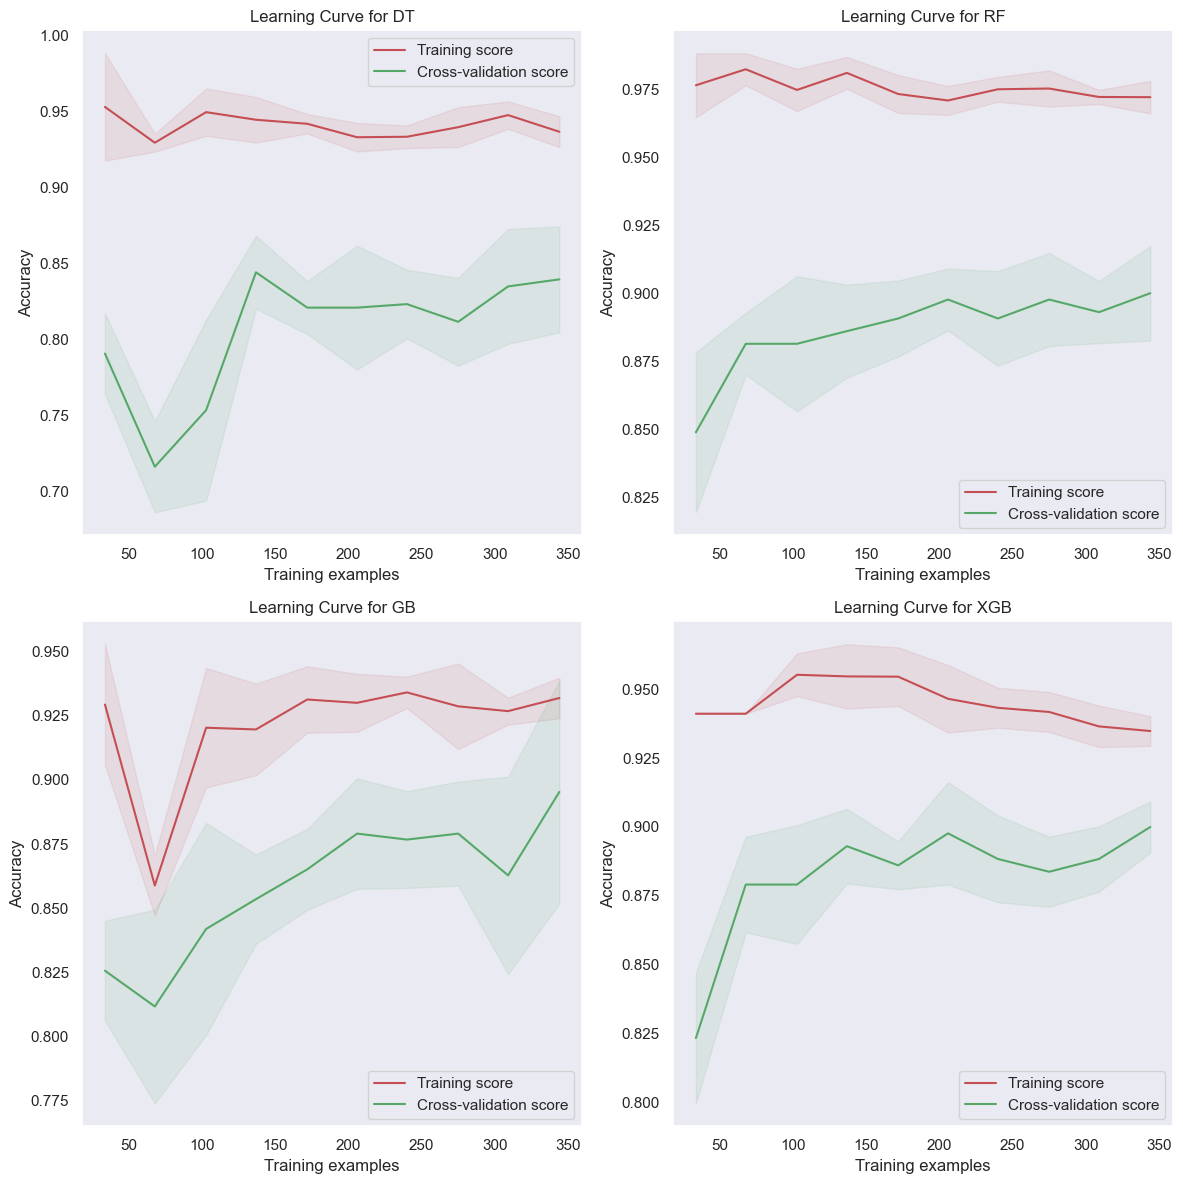

In [34]:
def plot_learning_curves(best_models, X_train, y_train, cv=5, scoring='accuracy'):
    num_models = len(best_models)
    nrows = (num_models + 1) // 2  # Dynamically calculate rows
    ncols = 2  # Set columns to 2 for the grid layout
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows))
    axes = axes.flatten()  # Flatten the grid to easily iterate over subplots
    for idx, (model_name, model) in enumerate(best_models.items()):
        # Generate learning curve data
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=cv, n_jobs=-1, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
        )
        # Calculate mean and standard deviation for training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        # Plot learning curve
        ax = axes[idx]  # Select subplot
        ax.set_title(f"Learning Curve for {model_name}")
        ax.set_xlabel("Training examples")
        ax.set_ylabel(scoring.capitalize())
        
        # Plot the training score curve
        ax.plot(train_sizes, train_scores_mean, label="Training score", color="r")
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, color="r", alpha=0.1)
        
        # Plot the validation score curve
        ax.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, color="g", alpha=0.1)
        ax.legend(loc="best")
        ax.grid()

    # If there are fewer models than subplots, turn off extra axes
    for i in range(len(best_models), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot learning curves for all models
plot_learning_curves(best_models, X_train_new, y_train)